In [ ]:
import pandas as pd
import numpy as np
from random import random
import itertools
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from IPython.display import Image
from PIL import Image
import seaborn as sns

!pip install scikit-learn-extra
import sklearn
import scipy
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

from sklearn.decomposition import PCA

     |████████████████████████████████| 1.7 MB 5.1 MB/s 


In [ ]:
from google.colab import files, drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_folder = "drive/MyDrive/Bayesian Learning Final Project/Submission/NN_model"

In [ ]:
tnKeys_file = os.path.join(root_folder, 'tnKeys.npy')
tnKeys = np.load(tnKeys_file)

train_file = os.path.join(root_folder, 'train_latent.npy')
train = np.load(train_file)

val_file = os.path.join(root_folder, 'val.npy')
val = np.load(val_file)

valKeys_file = os.path.join(root_folder, 'validation_latent.npy')
valKeys = np.load(valKeys_file)

In [ ]:
print('Train IDs')
print(tnKeys.shape)

print('Train')
print(train.shape)

print('Validation')
print(val.shape)

print('Validation IDs')
print(valKeys.shape)

Train IDs
(509,)
Train
(509, 138240)
Validation
(57, 138240)
Validation IDs
(57, 138240)


In [ ]:
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(val)
#train_df["Key"] = tnKeys

print(f"Length: {len(train_df)}")
print(f"Shape: {train_df.shape}")

'''mid = train_df['Key']
train_df.drop(labels=['Key'], axis=1,inplace = True)
train_df.insert(0, 'Key', mid)'''

Length: 509
Shape: (509, 138240)


"mid = train_df['Key']\ntrain_df.drop(labels=['Key'], axis=1,inplace = True)\ntrain_df.insert(0, 'Key', mid)"

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138200,138201,138202,138203,138204,138205,138206,138207,138208,138209,138210,138211,138212,138213,138214,138215,138216,138217,138218,138219,138220,138221,138222,138223,138224,138225,138226,138227,138228,138229,138230,138231,138232,138233,138234,138235,138236,138237,138238,138239
0,0.479572,0.020502,0.227588,0.233665,0.209937,0.189135,0.175982,0.211822,0.262780,0.337841,0.459153,0.047065,0.851376,0.679855,1.037770,1.026960,0.945221,0.902704,0.811492,0.763333,0.836264,0.915967,0.949401,0.463098,0.983980,0.956292,1.326848,1.256851,1.023268,0.850523,0.679355,0.533199,0.501340,0.739408,0.706417,0.227733,0.765313,0.888612,1.372221,1.255106,...,0.872905,0.863914,1.043014,0.338488,0.767403,1.151122,0.753866,0.397277,0.187621,0.087706,0.036233,0.150626,0.268437,0.313517,0.606103,0.083838,0.318505,0.535995,0.610755,0.601483,0.387929,0.310327,0.300560,0.314797,0.369898,0.314128,0.557209,0.320433,0.290223,0.299811,0.471521,0.510544,0.445792,0.405584,0.438062,0.532271,0.573741,0.613486,0.694184,0.307075
1,0.389346,0.056842,0.342170,0.311345,0.278588,0.253726,0.288382,0.259693,0.248936,0.338910,0.526289,0.124506,0.614801,0.477758,0.842289,0.815957,0.661402,0.630667,0.644171,0.601367,0.667042,0.825403,0.953925,0.534807,0.706832,0.555433,0.886536,0.970838,0.929479,0.792222,0.611599,0.403902,0.372781,0.646741,0.815937,0.332232,0.473888,0.196202,0.568514,1.068162,...,0.756447,0.801632,1.203387,0.504075,0.871228,1.199426,0.816244,0.617699,0.336604,0.267765,0.024710,0.004442,0.312672,0.385630,0.812684,0.268768,0.486628,0.771067,0.345122,0.284067,0.124287,0.175689,0.141442,0.113551,0.465926,0.682469,0.918945,0.584561,0.363092,0.396619,0.481020,0.655560,0.552857,0.423115,0.279637,0.235999,0.419582,0.445121,0.575579,0.315256
2,0.482814,0.069144,0.238318,0.217776,0.171827,0.153894,0.174569,0.234000,0.302400,0.350436,0.467577,0.059864,0.812443,0.654340,0.848751,0.795505,0.739376,0.730686,0.698231,0.652233,0.691892,0.793208,0.927180,0.423665,0.948542,0.879352,0.996707,0.924974,0.935344,1.009308,0.900664,0.701607,0.523265,0.558378,0.659481,0.172193,0.793426,0.708346,0.892663,0.984907,...,0.425135,0.632562,1.004011,0.384603,0.912581,1.318445,0.837177,0.605622,0.418801,0.430175,0.228843,0.094296,0.063457,0.136903,0.610024,0.137818,0.417700,0.669028,0.176881,0.320563,0.528540,0.279440,0.093289,0.138676,0.089401,0.180025,0.500619,0.276889,0.186523,0.238067,0.269047,0.456837,0.579457,0.299600,0.121137,0.172558,0.347124,0.559293,0.671677,0.309169
3,0.534822,0.063191,0.211134,0.203253,0.206279,0.262930,0.320436,0.371258,0.391641,0.385956,0.466733,0.054033,0.809208,0.589355,0.834007,0.857162,0.760300,0.716288,0.755693,0.794457,0.851906,0.882584,0.927589,0.436191,0.849872,0.601427,0.809393,0.817519,0.661612,0.483427,0.448602,0.443283,0.472700,0.685580,0.729138,0.187647,0.705928,0.562524,0.895927,0.946063,...,0.553031,0.578955,1.059381,0.423475,0.578589,0.525031,0.186294,0.079763,0.019723,0.026811,0.027604,0.007714,0.182692,0.177573,0.684758,0.168461,0.657937,0.842086,0.313143,0.177922,0.232865,0.597405,0.423549,0.185477,0.301344,0.371291,0.639522,0.333849,0.425584,0.538513,0.702210,0.548519,0.280856,0.304251,0.323448,0.343141,0.598312,0.646284,0.711238,0.329006
4,0.585813,0.162631,0.123107,0.269265,0.401109,0.365222,0.298209,0.257116,0.212342,0.226126,0.736588,0.204863,0.807921,0.527532,0.554130,0.729394,0.986638,0.943381,0.774045,0.723403,0.713736,0.634241,1.254252,0.619817,0.666005,0.700810,0.839388,1.045846,1.204123,1.093493,0.785853,0.483304,0.438529,0.546058,1.220069,0.515819,0.826728,0.929723,0.562703,0.899419,...,0.885810,0.965770,0.879932,0.184361,0.616475,0.708142,0.549536,0.749922,0.597513,0.481483,0.667211,0.621043,0.423304,0.854146,0.897016,0.080416,0.474330,0.486267,0.425502,0.567846,0.641461,0.606550,0.683879,0.724943,0.481142,0.936368,0.862225,0.150666,0.515965,0.556495,0.680974,0.728031,0.648983,0.465397,0.305356,0.463413,0.511678,1.

# KMedioid Clustering (Unnormalized)

In [ ]:
# Goal is to find 100 clusters that have uncorrelated features (low correlation metric)
cobj = KMedoids(n_clusters=100, metric='euclidean').fit(train_df)
labels = cobj.labels_

In [ ]:
unique_labels = set(labels)

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

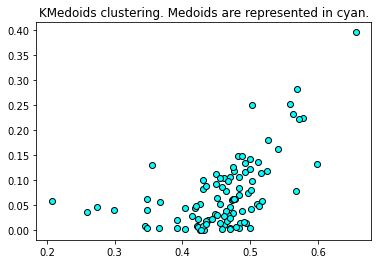

In [ ]:
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
cobj

KMedoids(n_clusters=100)

In [ ]:
cobj.cluster_centers_[0]

array([0.43755794, 0.01955701, 0.097271  , ..., 0.52588105, 0.65619749,
       0.30646586])

In [ ]:
cobj.cluster_centers_[0].shape

(138240,)

In [ ]:
np.count_nonzero(cobj.cluster_centers_[0])

138240

# KMedioid Clustering (Normalized)

In [ ]:
df = train_df
df_normalized=(df - df.mean()) / df.std()

In [ ]:
# Goal is to find 100 clusters that have uncorrelated features (low correlation metric)
cobj = KMedoids(n_clusters=100, metric='euclidean').fit(df_normalized)
labels = cobj.labels_

In [ ]:
unique_labels = set(labels)

Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

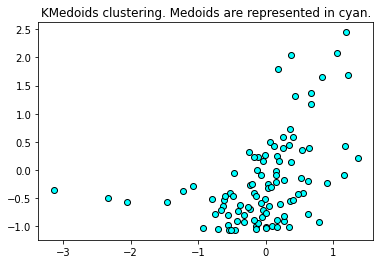

In [ ]:
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

In [ ]:
cobj

KMedoids(n_clusters=100)

In [ ]:
cobj.cluster_centers_[0]

array([0.26167518, 0.38258654, 0.00169942, ..., 0.9429341 , 1.34925885,
       1.58357845])

In [ ]:
cobj.cluster_centers_[0].shape

(138240,)

In [ ]:
np.count_nonzero(cobj.cluster_centers_[0])

138240

# KMedioid Clustering (k Iterations)

In [ ]:
inertias = []
range_list = range(1, 500, 25)

# Creating models while varying the number of clusters (k)
for k in range_list:
    # Fit model to samples
    model = KMedoids(n_clusters=k, metric='euclidean').fit(train_df)
  
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

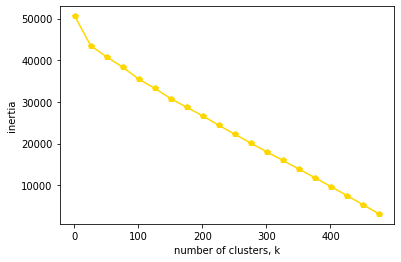

In [ ]:
plt.plot(range_list, inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

# PCA

In [ ]:
# You must normalize the data before applying the fit method
df = train_df
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=100)
pca.fit(df_normalized)

PCA(n_components=100)

In [ ]:
model.components_.T.shape

(138240, 100)

In [ ]:
# Reformat and view results
loadings = pd.DataFrame(model.components_)

In [ ]:
loadings[0].values

array([ 2.70150907e-04, -4.60145381e-04,  4.84766573e-03, -2.23061143e-04,
        1.31337821e-03,  1.65107569e-03,  1.82841487e-03,  1.36708677e-03,
       -3.46206299e-03, -4.59477538e-03, -1.14167536e-04, -1.00641557e-04,
        1.76612287e-03, -3.09292091e-03,  1.65481247e-03,  1.21759624e-03,
       -1.66371354e-03,  1.14076389e-03, -1.50755850e-03, -2.19626525e-03,
       -8.35846260e-03, -2.63336154e-03, -5.59674832e-03, -1.02537636e-03,
        3.51520919e-04, -3.14973623e-03,  2.90936446e-03,  2.22910287e-03,
       -1.83642395e-03,  6.43749210e-04, -5.56248478e-03,  2.99788337e-03,
        5.32687280e-03, -2.39851645e-04, -2.09309594e-03,  5.59786639e-03,
       -2.03547977e-03, -4.61475277e-03,  2.68678556e-03,  1.99488598e-03,
       -3.38231019e-03, -4.30810225e-04, -3.77828766e-04, -6.10107480e-03,
        3.88100973e-03,  7.80976752e-04,  2.06842799e-03,  2.90955909e-03,
        4.26326859e-04, -1.40425952e-03, -3.55021059e-03, -6.86815190e-04,
        8.13537562e-03, -

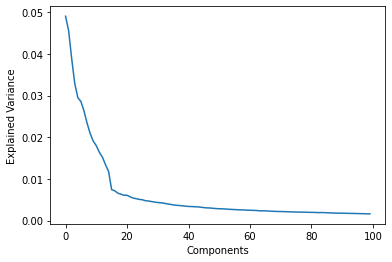

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

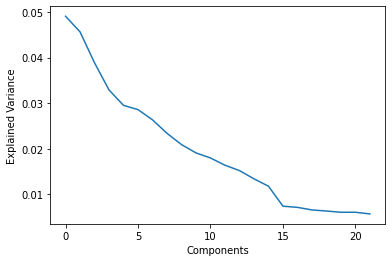

In [ ]:
plt.plot(pca.explained_variance_ratio_[:22])
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [ ]:
pca.explained_variance_ratio_

array([0.04907274, 0.04564347, 0.03885826, 0.03290027, 0.02951984,
       0.02859149, 0.02634495, 0.0233947 , 0.02091442, 0.01909605,
       0.01797914, 0.01638861, 0.01521421, 0.01340691, 0.0117892 ,
       0.00740644, 0.00714544, 0.00658123, 0.00633893, 0.00607057,
       0.00606903, 0.00570672, 0.00539795, 0.00524256, 0.00508379,
       0.00499105, 0.00475556, 0.00468762, 0.00455567, 0.00442837,
       0.00433032, 0.00425743, 0.00416364, 0.004014  , 0.00389051,
       0.00377349, 0.00366511, 0.00361361, 0.00353117, 0.00346134,
       0.00338647, 0.00335529, 0.00331187, 0.00328805, 0.00319744,
       0.00310551, 0.00304078, 0.00301012, 0.00293659, 0.00286893,
       0.00283364, 0.00281741, 0.00276998, 0.00270783, 0.00267849,
       0.00263467, 0.0025935 , 0.00255829, 0.00254889, 0.00248317,
       0.00247033, 0.00244292, 0.00241714, 0.00234897, 0.00233127,
       0.00232329, 0.00228879, 0.00222425, 0.00221281, 0.00217923,
       0.00215549, 0.00214872, 0.00212017, 0.00208622, 0.00207

In [ ]:
pd.DataFrame(pca.components_,columns=train_df.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,138200,138201,138202,138203,138204,138205,138206,138207,138208,138209,138210,138211,138212,138213,138214,138215,138216,138217,138218,138219,138220,138221,138222,138223,138224,138225,138226,138227,138228,138229,138230,138231,138232,138233,138234,138235,138236,138237,138238,138239
0,0.000270,0.001648,-0.000178,-0.000697,-0.001743,-0.002524,-0.002706,-0.003067,-0.003072,-0.003295,-0.000881,-0.000780,-0.000627,-0.000757,-0.000862,-0.001283,-0.001455,-0.001480,-0.001418,-0.002345,-0.003169,-0.003807,-0.001020,-0.001472,-0.001037,-0.001342,-0.001392,-0.000998,-0.000447,0.000603,0.002009,0.002546,0.001437,0.000345,0.001521,0.001565,-0.000879,-0.001247,-0.000863,-0.000260,...,-0.000869,-0.001731,-0.007056,-0.005274,0.002299,0.000302,0.000564,0.001159,0.001085,-0.000164,-0.000860,-0.001315,-0.001126,-0.000283,-0.004649,-0.001943,0.002230,0.000457,-0.000601,-0.001497,-0.003075,-0.003414,-0.003866,-0.003231,-0.002454,-0.003422,-0.004808,-0.003604,0.002673,0.001687,-0.000628,-0.001082,-0.001424,-0.001485,-0.001408,-0.001622,-0.002844,-0.004729,-0.004328,-0.003255
1,-0.000460,0.000889,0.002478,0.001624,-0.000030,-0.001830,-0.003303,-0.002979,-0.001466,-0.000389,-0.000910,0.000248,-0.000072,0.001541,0.002165,0.001366,0.001680,0.002076,0.001231,-0.001442,-0.003898,-0.003503,-0.002438,-0.002620,-0.000701,0.001962,0.001905,0.002113,0.003730,0.005289,0.005894,0.004893,-0.000184,-0.005089,-0.005017,-0.004275,-0.001618,-0.001078,-0.000738,0.001508,...,-0.003538,-0.000999,0.002055,-0.000013,0.002729,0.003406,0.002850,0.001385,-0.000804,-0.001538,-0.002929,-0.005181,-0.005826,-0.005557,-0.001971,-0.003550,0.003240,0.001619,0.000851,0.000413,-0.000872,-0.002512,-0.002990,-0.002623,-0.003368,-0.002859,0.000130,-0.000479,-0.000147,-0.000801,-0.001028,-0.001461,-0.002455,-0.003137,-0.004343,-0.005403,-0.005581,-0.003562,-0.002113,-0.001925
2,0.004848,0.002452,0.000753,0.000110,0.000012,0.000455,0.001087,0.002945,0.005134,0.001741,-0.002717,-0.001637,0.004330,0.004239,0.003507,0.002980,0.002963,0.002834,0.002928,0.003006,0.003142,-0.000325,-0.003009,-0.008141,0.002821,0.001348,0.001389,0.001603,0.000853,0.000733,0.000900,0.000981,0.000649,-0.002716,-0.001673,-0.007183,0.000166,-0.000226,0.001173,0.001122,...,-0.001356,-0.000420,-0.005545,-0.007079,0.001264,-0.000501,-0.001632,-0.000873,-0.000294,-0.002151,-0.004090,-0.004479,-0.005642,-0.005921,-0.008244,-0.008261,0.001092,0.000799,-0.000899,-0.001190,-0.001633,-0.002154,-0.002589,-0.003308,-0.005850,-0.006806,-0.008945,-0.009843,0.000635,-0.000235,-0.001886,-0.002675,-0.003198,-0.003149,-0.002766,-0.003578,-0.005473,-0.005812,-0.007073,-0.007380
3,-0.000223,-0.003047,-0.004122,-0.004520,-0.004574,-0.003195,-0.000865,0.000763,0.001608,-0.000929,-0.003165,-0.002873,-0.001469,-0.002471,-0.002231,-0.002161,-0.002143,-0.002371,-0.002194,-0.001490,-0.000213,-0.001638,-0.003274,-0.004597,-0.001550,-0.001975,-0.001617,-0.000978,-0.000218,-0.000032,-0.000046,-0.000794,-0.001315,-0.002298,-0.002832,-0.004602,0.000620,0.002042,0.001902,0.001645,...,-0.002953,-0.002081,-0.003953,-0.004496,-0.001828,-0.003539,-0.005030,-0.004482,-0.004776,-0.003436,-0.002319,-0.002869,-0.004081,-0.004303,-0.005432,-0.004941,-0.001269,-0.001462,-0.002092,-0.002536,-0.002025,-0.003542,-0.004169,-0.005046,-0.005518,-0.005752,-0.005478,-0.005104,-0.003726,-0.004223,-0.003224,-0.002984,-0.004160,-0.005235,-0.005107,-0.005197,-0.004756,-0.004002,-0.004405,-0.004687
4,0.001313,-0.003182,-0.001308,-0.000149,0.000512,0.001717,0.003368,0.003861,0.003603,0.002987,0.000628,0.000726,0.002683,0.000292,0.000257,-0.000067,-0.000495,-0.000220,0.001303,0.002803,0.003787,0.002797,0.000293,-0.000957,0.002045,-0.000533,-0.000074,-0.000992,-0.001820,-0.002466,-0.002050,-0.000977,0.000999,0.002045,0.001018,-0.000805,0.001832,0.000796,0.001522,0.000348,...,-0.001132,0.000407,0.000997,-0.001553,-0.004070,-0.002804,-0.000832,0.000076,-0.000220,

In [ ]:
n_pcs

100

In [ ]:
model.components_[3].sum()

16.609096254468064

In [ ]:
model.components_[3].argmax()

132762

In [ ]:
X_pc = model.transform(train_df)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [ ]:
len(most_important)

100

In [ ]:
most_important[:15]

[79175,
 77073,
 19257,
 120294,
 14580,
 103500,
 81480,
 753,
 130614,
 122850,
 43878,
 136487,
 20618,
 23144,
 135088]

In [ ]:
initial_feature_names = [str(x) for x in train_df.columns]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
df

,0,1
0,PC0,79175
1,PC1,77073
2,PC2,19257
3,PC3,120294
4,PC4,14580
...,...,...
95,PC95,120693
96,PC96,118016
97,PC97,100221
98,PC98,29866


In [ ]:
pc_short = df[0:50]
list(pc_short[1])

['79175',
 '77073',
 '19257',
 '120294',
 '14580',
 '103500',
 '81480',
 '753',
 '130614',
 '122850',
 '43878',
 '136487',
 '20618',
 '23144',
 '135088',
 '111436',
 '86784',
 '109113',
 '85389',
 '10455',
 '123153',
 '114781',
 '128144',
 '91440',
 '71455',
 '52236',
 '33164',
 '31098',
 '109702',
 '8637',
 '57685',
 '5628',
 '65872',
 '131360',
 '108801',
 '86387',
 '65313',
 '135383',
 '14736',
 '33313',
 '38074',
 '90173',
 '18411',
 '6840',
 '10350',
 '105859',
 '23535',
 '118993',
 '32469',
 '85670']

In [ ]:
pca_train = train_df[[int(x) for x in list(pc_short[1])]]
pca_val = val_df[[int(x) for x in list(pc_short[1])]]

In [ ]:
train_df.shape

(509, 138240)

In [ ]:
pca_train.shape

(509, 50)

In [ ]:
pca_val.shape

(57, 50)

In [ ]:
val.shape

(57, 138240)

In [ ]:
pca_train.to_csv(root_folder+'/pca_latent_train_50.csv')
pca_val.to_csv(root_folder+'/pca_latent_val_50.csv')

In [ ]:
ls "drive/MyDrive/Bayesian Learning Final Project/Submission/NN_model"